In [224]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import layers,optimizers,losses
from tensorflow.keras import Sequential, regularizers
from sklearn.model_selection import train_test_split

In [225]:
dataset = pd.read_csv("titanic.csv")

In [226]:
dataset.shape

(418, 12)

In [227]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [228]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [229]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [230]:
num_cols = []
cat_cols = []

In [231]:
for name,type in dataset.dtypes.items():
    if type == 'object':
        cat_cols.append(name)
    else:
        num_cols.append(name)

In [232]:
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [233]:
dataset[num_cols].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


<Axes: >

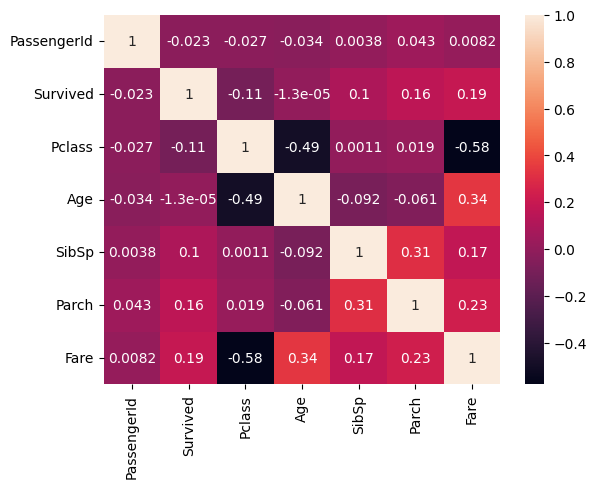

In [234]:
sns.heatmap(dataset[num_cols].corr(),annot = True)

In [235]:
dataset["Pclass"].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

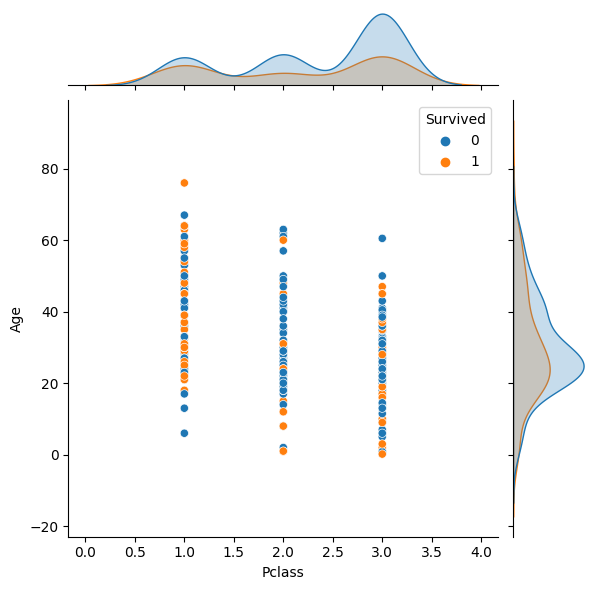

In [236]:
sns.jointplot(x = "Pclass", y= "Age", data = dataset,hue = "Survived")

<Axes: xlabel='Pclass', ylabel='Age'>

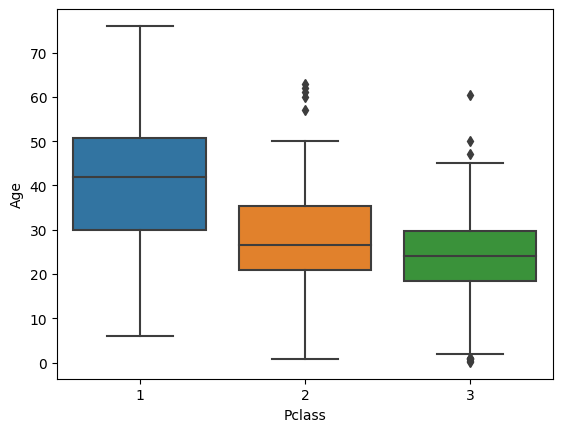

In [237]:
sns.boxplot(x = "Pclass", y = "Age",data = dataset)

<Axes: xlabel='Pclass', ylabel='Age'>

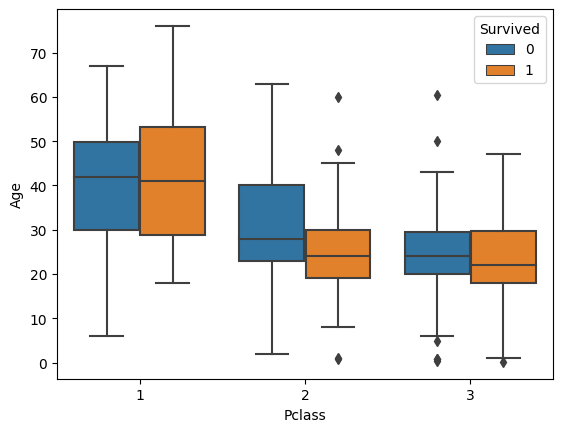

In [238]:
sns.boxplot(x = "Pclass", y = "Age",data = dataset,hue = "Survived")

In [239]:
datawithmeanage = dataset.copy()

In [240]:
datawithmeanage["Age"].fillna(datawithmeanage["Age"].mean(),inplace = True)

In [241]:
datawithmeanage.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

C:\Users\ROHIT CHANDRA\AppData\Local\Temp\ipykernel_18684\3066764105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datawithmeanage["Age"])


<Axes: xlabel='Age', ylabel='Density'>

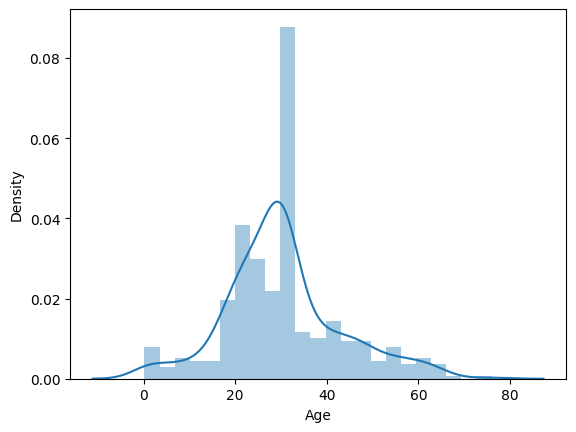

In [242]:
sns.distplot(datawithmeanage["Age"])

In [243]:
datawithmeanage.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [244]:
datawithmeanage["Cabin"].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [245]:
datawithmeanage.groupby("Pclass")["Cabin"].apply(lambda x: x.isna().sum())

Pclass
1     27
2     86
3    214
Name: Cabin, dtype: int64

In [246]:
datawithmeanage.groupby("Pclass")["Cabin"].apply(lambda x: x.value_counts())

Pclass                 
1       B57 B59 B63 B66    3
        B45                2
        C31                2
        E34                2
        C89                2
                          ..
2       D38                1
3       F G63              1
        G6                 1
        F E46              1
        F E57              1
Name: Cabin, Length: 76, dtype: int64

In [247]:
datawithmeanage.groupby("Pclass")["Fare"].apply(lambda x: x.describe())

Pclass       
1       count    107.000000
        mean      94.280297
        std       84.435858
        min        0.000000
        25%       30.100000
        50%       60.000000
        75%      134.500000
        max      512.329200
2       count     93.000000
        mean      22.202104
        std       13.991877
        min        9.687500
        25%       13.000000
        50%       15.750000
        75%       26.000000
        max       73.500000
3       count    217.000000
        mean      12.459678
        std       10.803698
        min        3.170800
        25%        7.750000
        50%        7.895800
        75%       14.400000
        max       69.550000
Name: Fare, dtype: float64

In [248]:
datawithmeanage.drop(columns = ["Cabin"],axis = 1,inplace = True)

In [249]:
datawithmeanage.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [250]:
datawithmeanage["Fare"].fillna(datawithmeanage["Fare"].mean(),inplace = True)

In [251]:
datawithmeanage["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [252]:
datawithmeanage["SibSp"].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [253]:
datawithmeanage.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [254]:
datawithmeanage.drop(columns = ["Name","Ticket"],axis = 1,inplace = True)

<Axes: xlabel='Embarked', ylabel='count'>

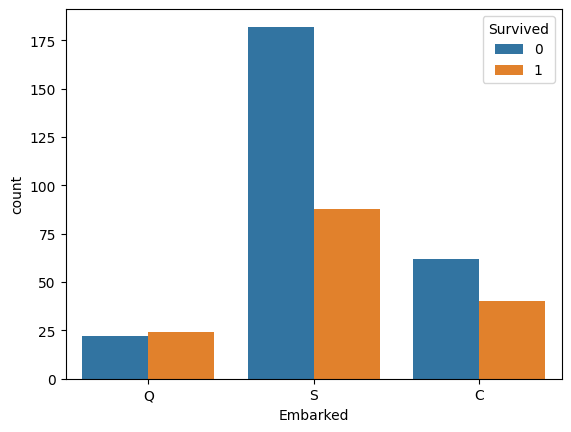

In [255]:
sns.countplot(x = "Embarked",data = datawithmeanage,hue = "Survived")

In [256]:
datawithmeanage.drop(columns = ["Embarked","Parch","SibSp"],axis = 1,inplace = True)

In [257]:
datawithmeanage.drop(columns = ["PassengerId"],axis = 1,inplace = True)

In [258]:
datawithmeanage.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [259]:
X = datawithmeanage[["Age","Pclass","Sex","Fare"]]
y = datawithmeanage[["Survived"]]

In [260]:
num_processor = Pipeline(
    steps = [("Scaling",StandardScaler())]
)

In [261]:
cat_processor = Pipeline(
    steps = [("Encoding",OneHotEncoder())]
)

In [262]:
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", cat_processor, ["Sex"]),  # Process 'Sex' column as categorical
        ("numerical", num_processor, ["Age", "Fare"]),  # Process 'Age' and 'Fare' columns as numerical
    ],
    remainder="passthrough"  # Passthrough any columns not specified
)

In [284]:
def create_model():
    model = Sequential([
    layers.Dense(128, input_shape=(5,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])
    model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss=losses.BinaryCrossentropy()
)
    return model


In [264]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [279]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', create_model())
])

c:\Users\ROHIT CHANDRA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [285]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('Encoding',
                                                                   OneHotEncoder())]),
                                                  ['Sex']),
                                                 ('numerical',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare'])])),
                ('model', <Sequential name=sequential_11, built=True>)])

In [286]:
pipe.fit(X_train, y_train)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1418 


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('Encoding',
                                                                   OneHotEncoder())]),
                                                  ['Sex']),
                                                 ('numerical',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare'])])),
                ('model', <Sequential name=sequential_11, built=True>)])

In [287]:
y_pred = pipe.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [288]:
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [289]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.855072463768116


In [160]:
# from sklearn.ensemble import RandomForestClassifier

In [186]:
# from xgboost import XGBClassifier

In [187]:
# model2 = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', XGBClassifier())
# ])

In [163]:
# X_train["Sex"].dtype

dtype('O')

In [188]:
# model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('Encoding',
                                                                   OneHotEncoder())]),
                                                  ['Sex']),
                                                 ('numerical',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [191]:
# from sklearn.metrics import accuracy_score, classification_report
# y_pred = model2.predict(X_train)
# print(f'Accuracy: {accuracy_score(y_train, y_pred)}')

Accuracy: 1.0


In [193]:
# print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       106

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280

